#  Prerequisitos con Pandas - Parte 2

En esta nota utilizará un dataframe de pandas para realizar estadísticas.  Trabajaremos con [data de Tesla del año 2010 al 2020](https://www.kaggle.com/timoboz/tesla-stock-data-from-2010-to-2020) descargada de Kaggle.

La información se encuentra en la carpeta Prerequisitos/data y es llamada TSLA.csv.

Comenzaremos leyendo el DataFrame para ver como luce el la información.

In [3]:
# importamos las librerías
import pandas as pd
import os

# observamos en que directorio nos encontramos
print(os.getcwd())

C:\Users\esteb\Desktop\ArtificialIntelligence-master\Prerequisitos


In [4]:
# leemos el csv a un dataframe
path = os.path.join('data', 'TSLA.csv')
df = pd.read_csv(path)

# leemos las primeras 10 lineas
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
6,2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
7,2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600
8,2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500
9,2010-07-13,17.389999,18.639999,16.900000,18.139999,18.139999,2680100


El dataframe esta etiquedato automaticamente por índices en cada fila y las colmnas por medio de sus nombres propios en el csv.

### Su labor

Ahora cargará el mismo dataframe pero solo utilizando *Date* y *Adj Close* o *Close* de los datasets de Nvidia y Adobe que se encuentran en la misma carpeta.

En adicion, utilizaremos *Date* como índice de filas y finalmente tendremos que reconocer el dataframe las fechas actuales como Año/Mes/Día y no como strings.  Para cada stock ud. debe completar estas actividades utilizando pd.read_csv().

Algunas de las posibles ayudas:
- Utilizar **index_col** para utilizar las columnas como índices, por ejemplo, index_col= ['High']
- Utilizar **parse_dates = True** para convertir las fechas en Año/Mes/día
- Utilziar **usecols** para seleccionar cuales columnas ud quiere agregar al DataFrame.  Por ejemplo usecols= ['Low', 'Open']

Llene el código inferior...

In [6]:
# cargar el dataset de Nvidia en un dataframe
ds_path = os.path.join('data', 'NVDA.csv')
nvidia_df = pd.read_csv(ds_path,index_col = ['date'], parse_dates = True, usecols = ['date','close']) 
# cargar el dataset de Adobe en un dataframe
ds_path = os.path.join('data', 'ADBE.csv')
adobe_df = pd.read_csv(ds_path,index_col = ['date'], parse_dates = True, usecols = ['date','close'])

In [7]:
nvidia_df.head()

,close
date,
2013-02-08,12.37
2013-02-11,12.51
2013-02-12,12.43
2013-02-13,12.37
2013-02-14,12.73


<img src="imgs/pandas_parte2_1.PNG" align="left" />

Ahora ud unirá los DataFrames de arriba para crear solamente un DataFrame entero que contenga *close* para todos los stocks.  Para esto vamos a crear un dataframe vació que tenga los índices de filas de calendario mínimas y máximas de las acciones.  

Utilizaremos pd.date_range(), esta función crea los días calendario ordenadamente y luego crearemos el dataframe utilizando estos índices como filas.

In [8]:
#  Creamos el calendario de fechas
min_date = nvidia_df.index.min()
max_date = nvidia_df.index.max()
dates = pd.date_range(min_date, max_date)
dates

DatetimeIndex(['2013-02-08', '2013-02-09', '2013-02-10', '2013-02-11',
               '2013-02-12', '2013-02-13', '2013-02-14', '2013-02-15',
               '2013-02-16', '2013-02-17',
               ...
               '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
               '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05',
               '2018-02-06', '2018-02-07'],
              dtype='datetime64[ns]', length=1826, freq='D')

Respuesta esperada:
```
DatetimeIndex(['2013-02-08', '2013-02-09', '2013-02-10', '2013-02-11',
               '2013-02-12', '2013-02-13', '2013-02-14', '2013-02-15',
               '2013-02-16', '2013-02-17',
               ...
               '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
               '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05',
               '2018-02-06', '2018-02-07'],
              dtype='datetime64[ns]', length=1826, freq='D')
```

In [9]:
stocks = pd.DataFrame(index=dates)
stocks.head()

""
2013-02-08
2013-02-09
2013-02-10
2013-02-11
2013-02-12


Respuesta esperada:

<img src="imgs/pandas_parte2_2.PNG" align="left" />

Ahora unirá los dataframes individiales de nvidia y adobe en el dataframe *stocks*.  Sin embargo, recuerde que antes de unificarlo debe cambiar el nombre de columnas de los dataframes, favor cambiarlos a *close_nvidia* y *close_adobe* respectivamente.  Esto se debe debido a que deben ser llaves únicas, sino dará problemas al unificarse (todas tienen el mismo nombre *close*).  

Ud puede hacer esto con la función pd.DataFrame.rename().

In [10]:
# Cambiar el nombre en close del dataframe de nvidia 'close_nvidia'
nvidia_df =nvidia_df.rename(columns={'close':'close_nvidia'})
nvidia_df.sort_index(inplace=None)
# Cambiar el nombre en close del dataframe de adobe a 'close_adobe'
adobe_df = adobe_df.rename(columns={'close':'close_adobe'})
adobe_df.sort_index(inplace=None)

,close_adobe
date,
2013-02-08,39.12
2013-02-11,38.64
2013-02-12,38.89
2013-02-13,38.81
2013-02-14,38.61
...,...
2018-02-01,199.38
2018-02-02,195.64
2018-02-05,190.27


Puede verificar que realizó bien la operación si imprime las primeras líneas de algun dataframe

In [11]:
# Desplegamos para ver si operó bien lo que realizamos
adobe_df.head()

,close_adobe
date,
2013-02-08,39.12
2013-02-11,38.64
2013-02-12,38.89
2013-02-13,38.81
2013-02-14,38.61


Respuesta esperada:

<img src="imgs/pandas_parte2_3.PNG" align="left" />

Ahora que tiene los datasets ordenados y cambiados, podemos añadir todo al dataframe de stocks.  Para esto utilizamos DataFrame.join().  Lo que realiza dataframe1.join(dataframe2) es que unirá el dataframe1 con el dataframe2.

Llene los códigos inferiores para realizar los cambios.

In [12]:
stocks = stocks.join(nvidia_df)
stocks = stocks.join(adobe_df)

Ahora podemos verificar si hemos hecho correctamente el cambio desplegando el dataframe de stocks

In [13]:
stocks.head()

,close_nvidia,close_adobe
2013-02-08,12.37,39.12
2013-02-09,NaN,NaN
2013-02-10,NaN,NaN
2013-02-11,12.51,38.64
2013-02-12,12.43,38.89


Respuesta esperada:

<img src="imgs/pandas_parte2_4.PNG" align="left" />

### Análsis del DataFrame

Ahora procedemos a la parte analítica del dataframe.  Primero vamos a verificar si no tenemos ningnos valores *NaN*.  Llene el espacio inferior con lo que se recomienda realizar

In [14]:
# Verifique si existen valores Nan en el dataframe de stocks
stocks.isnull().sum().sum()

1134

Respuesta esperada:

1134

In [15]:
# Remueva estos 1134 valores
stocks.dropna(axis = 0, inplace= True)
print()

In [17]:
# Valide nuevamente el resultado de su eliminación
stocks.isnull().sum().sum()

0

Respuesta esperada:

0

Ahora que está limpio el dataset podemos realizar algunas estadísticas básicas.  Calcular:
- el promedio movil 
  - dataframe.rolling().mean() tiene un argumento en rolling... dataframe.rolling(N).mean() calcula para la muestra de días deseada
    - calcular entonces el promedio movil para 10 meses
- la mediana del precio de mercado por dataframe.mean()
- la desviación estándar
- la correlación de los stocks

In [ ]:
# calcular el promedio móvil para cada 10 meses
moving_avg = None 
moving_avg

<img src="imgs/pandas_parte2_5.PNG" align="left" />

In [18]:
# calcular la media
stocks.mean()

close_nvidia    56.369368
close_adobe     90.458156
dtype: float64

Respuesta esperada:
    
```
close_nvidia    56.369368
close_adobe     90.458156
dtype: float64
```

In [19]:
# calcular la desviación estándar
stocks.std()

close_nvidia    59.624642
close_adobe     36.997773
dtype: float64

Respuesta esperada:

```
close_nvidia    59.624642
close_adobe     36.997773
dtype: float64
```

In [20]:
# calcular la correlación de datos
stocks.corr()

,close_nvidia,close_adobe
close_nvidia,1.000000,0.950835
close_adobe,0.950835,1.000000


Respuesta esperada:


<img src="imgs/pandas_parte2_6.PNG" align="left" />

Todo esta bien, pero como vemos, los primeros 10 datos del dataframe tienen valores nulos, esto se debe a que el promedio movil se calcula contra un período atrás y como el primer período de 10 datos no existe, nos dá valores nulos.

Podemos entonces visualziar el dataframe en un gráfico.  Debajo se muestra el código para solo ejecutar y ver visualmente los stock de cada uno.

NameError: name 'moving_avg' is not defined

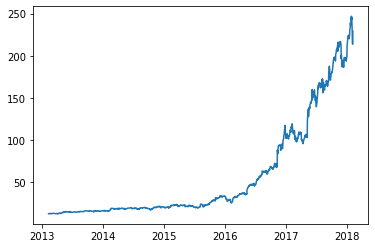

In [21]:
# permite graficar en el notebook
%matplotlib inline

# importamos matplotlib
import matplotlib.pyplot as plt

# graficar nvidia y adobe
plt.plot(stocks['close_nvidia'])

# ahora graficamos la media y el precio de stock
plt.plot(moving_avg)
plt.legend(['Stock Price', 'Moving Average'])
plt.show()

Respuesta esperada:

<img src="imgs/pandas_parte2_7.PNG" align="left" />